In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

In [2]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'

In [3]:
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml') 
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1] 

In [4]:
df = pd.DataFrame()

In [5]:
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

In [6]:
for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)  
    df = df.append(pd.read_html(page_url, header=0)[0])

In [7]:
df = df.dropna()
df = df.iloc[0:30] 
df = df.sort_values(by='날짜') 

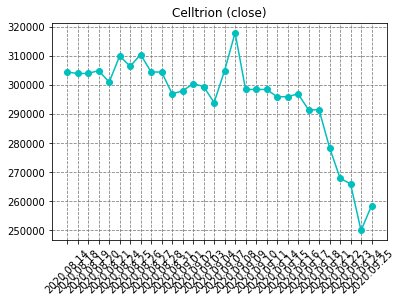

In [8]:
plt.title('Celltrion (close)')
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()